In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import scipy
from scipy import stats
import statistics
from scipy.stats import skew
df=pd.read_csv('gapminder-FiveYearData.csv')

In [11]:
df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [13]:
df.shape

(1704, 6)

In [14]:
df.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [15]:
df.dtypes

country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [48]:
continent_country_df=df[['continent','country']]
continent_country_df

,continent,country
0,Asia,Afghanistan
1,Asia,Afghanistan
2,Asia,Afghanistan
3,Asia,Afghanistan
4,Asia,Afghanistan
...,...,...
1699,Africa,Zimbabwe
1700,Africa,Zimbabwe
1701,Africa,Zimbabwe
1702,Africa,Zimbabwe


In [49]:
continent_country_df.nunique()

continent      5
country      142
dtype: int64

In [50]:
df.loc[[0,99,999]]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
99,Bangladesh,1967,62821884.0,Asia,43.453,721.186086
999,Mongolia,1967,1149500.0,Asia,51.253,1226.041130


In [51]:
df.head(n=10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


In [52]:
df.iloc[99]

country       Bangladesh
year                1967
pop          6.28219e+07
continent           Asia
lifeExp           43.453
gdpPercap        721.186
Name: 99, dtype: object

In [54]:
year_pop_df=df.loc[:,['year','lifeExp']]
year_pop_df

,year,lifeExp
0,1952,28.801
1,1957,30.332
2,1962,31.997
3,1967,34.020
4,1972,36.088
...,...,...
1699,1987,62.351
1700,1992,60.377
1701,1997,46.809
1702,2002,39.989


In [55]:
year_lifeExp_gdpPercap=df.iloc[:,[1,4,-1]]
year_lifeExp_gdpPercap.head(5)

,year,lifeExp,gdpPercap
0,1952,28.801,779.445314
1,1957,30.332,820.853030
2,1962,31.997,853.100710
3,1967,34.020,836.197138
4,1972,36.088,739.981106


In [57]:
grp_year_continent_pop_lifeExp_gdpPercap_df=df.groupby(['year','continent'])[['pop','lifeExp','gdpPercap']].mean()
grp_year_continent_pop_lifeExp_gdpPercap_df.head(10)

pop    lifeExp     gdpPercap
year continent                                       
1952 Africa     4.570010e+06  39.135500   1252.572466
     Americas   1.380610e+07  53.279840   4079.062552
     Asia       4.228356e+07  46.314394   5195.484004
     Europe     1.393736e+07  64.408500   5661.057435
     Oceania    5.343003e+06  69.255000  10298.085650
1957 Africa     5.093033e+06  41.266346   1385.236062
     Americas   1.547816e+07  55.960280   4616.043733
     Asia       4.735699e+07  49.318544   5787.732940
     Europe     1.459635e+07  66.703067   6963.012816
     Oceania    5.970988e+06  70.295000  11598.522455

In [58]:
flat=grp_year_continent_pop_lifeExp_gdpPercap_df.reset_index()
flat.head(10)

,year,continent,pop,lifeExp,gdpPercap
0,1952,Africa,4.570010e+06,39.135500,1252.572466
1,1952,Americas,1.380610e+07,53.279840,4079.062552
2,1952,Asia,4.228356e+07,46.314394,5195.484004
3,1952,Europe,1.393736e+07,64.408500,5661.057435
4,1952,Oceania,5.343003e+06,69.255000,10298.085650
5,1957,Africa,5.093033e+06,41.266346,1385.236062
6,1957,Americas,1.547816e+07,55.960280,4616.043733
7,1957,Asia,4.735699e+07,49.318544,5787.732940
8,1957,Europe,1.459635e+07,66.703067,6963.012816
9,1957,Oceania,5.970988e+06,70.295000,11598.522455


In [59]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

<AxesSubplot:xlabel='year'>

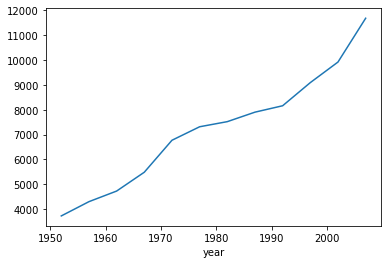

In [60]:
grp_year_gdpPercap_df=df.groupby('year')['gdpPercap'].mean()
grp_year_gdpPercap_df.plot()

plot of mean gdp per capita growth with year

<AxesSubplot:xlabel='year'>

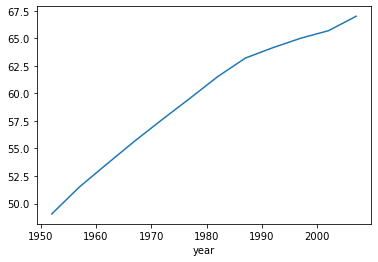

In [61]:
grp_year_lifeExp_df=df.groupby('year')['lifeExp'].mean()
grp_year_lifeExp_df.plot()

mean Life expectancy vs year plot

In [72]:
country_lifeExp_df=df.groupby('country')['lifeExp'].mean()
country_lifeExp_df.tail(10)

country
Uganda                47.618833
United Kingdom        73.922583
United States         73.478500
Uruguay               70.781583
Venezuela             66.580667
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen Rep.            46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, dtype: float64

In [81]:
df.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [94]:
x=flat.sort_values(by=['year','gdpPercap'], ascending=True)
y=x.iloc[:,4]
y.mean()

10064.620023712914

In [95]:
y.median()

8116.201552484244

In [97]:
np.percentile(y,50)

8116.201552484244

In [98]:
skew(y)

0.9072239554676224

positive value indicates that it is right skewed plot

In [102]:
statistics.pstdev(y)

6976.255556544251

population standard deviation

In [103]:
statistics.stdev(y)

7035.127955196045

standard deviation

{'whiskers': [<matplotlib.lines.Line2D at 0x21472e4b310>,
 'caps': [<matplotlib.lines.Line2D at 0x21472e4b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21472e3cf70>],
 'medians': [<matplotlib.lines.Line2D at 0x21472e570d0>],
 'fliers': [],
 'means': []}

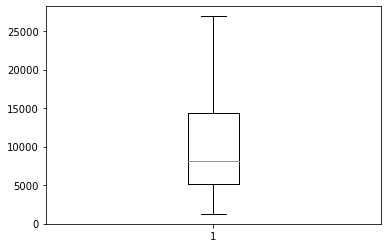

In [105]:
plt.boxplot(y,sym='')

Whisker plot clearly shows the right skewness of gdp per capita

<BarContainer object of 1704 artists>

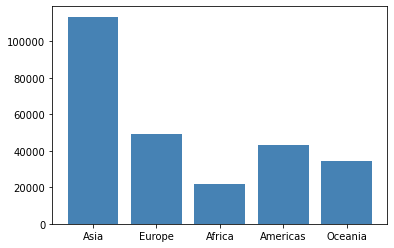

In [114]:
color1 = 'steelblue'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df['continent'], df['gdpPercap'], color=color1)

<BarContainer object of 1704 artists>

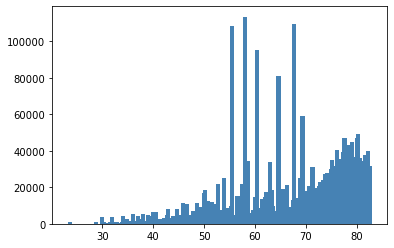

In [121]:
fig, ax = plt.subplots()
ax.bar(df['lifeExp'], df['gdpPercap'], color=color1)

life expectancy vs gdp per capita bar plot